<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Linear Regression 선형회귀분석](https://paullabworkspace.notion.site/Linear-Regression-c933927f7055418fb3369a1d7bbf2bb6)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [4]:
# dataset 이라는 용어는 여러번 중복 사용될 수 있습니다. 정확한 데이터명을 작성해주면 좋습니다.
california = fetch_california_housing()

print(california.keys())
print(california.feature_names)

y = california.target

df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


| 칼럼명 | 뜻 |
| --- | --- |
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup(average house occupancy ) | 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |

In [6]:
df_california.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [5]:
df_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df_california, y, test_size=0.2, random_state=156)

model_lr = LinearRegression()
model_lr.fit(X_train ,y_train )
y_preds = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3F}'.format(mse , rmse))
print('r2_score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 0.558, RMSE: 0.747
r2_score: 0.581


- Mean Absolute Error (MAE): 직관적 : 평균 절대 오차
- Mean Squared Error (MSE): 평균 제곱 오차

In [8]:
print('절편 값:', model_lr.intercept_)
print('회귀 계수값:', model_lr.coef_)

절편 값: -36.74355727491055
회귀 계수값: [ 4.35315175e-01  9.91669869e-03 -1.01245997e-01  6.08198410e-01
  1.92128198e-07 -8.38745055e-03 -4.21457690e-01 -4.32930805e-01]


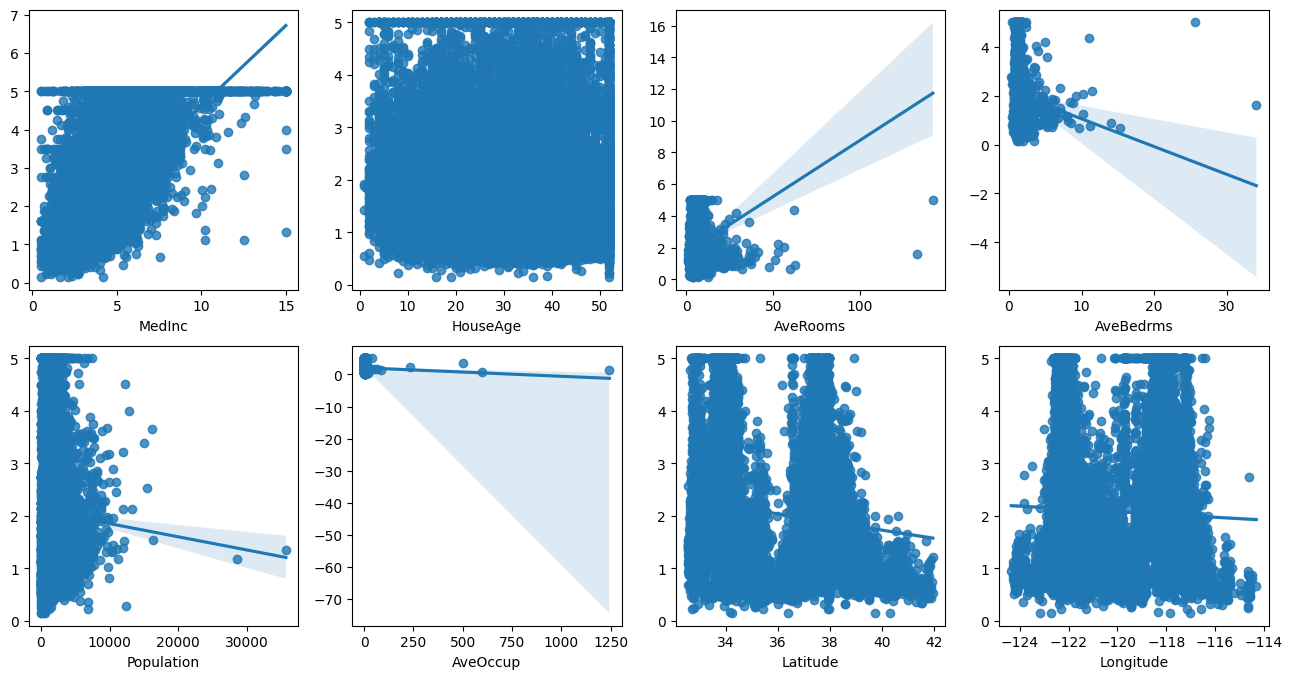

In [9]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4 , nrows=2)
lm_features = ['MedInc','HouseAge','AveRooms','AveBedrms',
               'Population','AveOccup','Latitude','Longitude']

for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # ax=axs[row][col] 서브플랏
    sns.regplot(x=feature , y=y,data=df_california , ax=axs[row][col])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_california)
house_scaled = scaler.transform(df_california)

house_scaled = pd.DataFrame(data=house_scaled, columns=df_california.columns)
house_scaled

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    house_scaled, y, test_size=0.2,  random_state=156)

model_lr2 = LinearRegression()
model_lr2.fit(X_train2 ,y_train2 )
y_preds2 = model_lr2.predict(X_test2)

mse2 = mean_squared_error(y_test2, y_preds2)
rmse2 = np.sqrt(mse2)

print('MSE2: {0:.3f} , RMSE2: {1:.3F}'.format(mse2 , rmse2))
print('r2_score: {0:.3f}'.format(r2_score(y_test2, y_preds2)))

print('--기존 표준화 전 모델 비교--')

model_lr = LinearRegression()
model_lr.fit(X_train ,y_train )
y_preds = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse , rmse))
print('r2_score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE2: 0.558 , RMSE2: 0.747
r2_score: 0.581
--기존 표준화 전 모델 비교--
MSE: 0.558 , RMSE: 0.747
r2_score: 0.581
